# Minimization
Find the minimum of a function.

One good and generic implementation is with 

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [26]:
import scipy.optimize as optimize
import scipy.interpolate as interpolate
optimize.fmin_powell?
import pandas as pd

preparar un conjunto de puntos `x` y `y` tal qui al fitearlos con un polinomio (de grado $n$ o en la representación de Lagrange) muestre dos mínimos, uno global y el otro local

El polinimo es una función de la variable `x`. Aplicar dos veces `optimize.fmin_powell` para encontrar los dos mínimos 

# Tarea 6

Puntos a intrepolar

In [9]:
X=[2.5,3.1,4.5,5,5.9,6.2]
Y=[3,-1.01,1.5,0.7,2.8,1.5]

Interpolación de Lagrange

In [23]:
pol=interpolate.lagrange(X,Y)
x=np.linspace(X[0],X[5])

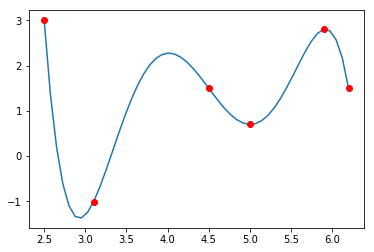

In [29]:
plt.plot(x,pol(x))
plt.plot(X,Y,'ro')

Encontrando en primer mínimo cerca de $3$(que resulta ser el mínimo global en $[0,6]$) y cerca de $5$(un mínimo local)

In [31]:
min1=optimize.fmin_powell(pol,3,full_output=True)
min2=optimize.fmin_powell(pol,5,full_output=True)

Optimization terminated successfully.
         Current function value: -1.374113
         Iterations: 2
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.699898
         Iterations: 2
         Function evaluations: 30


In [36]:
print('El mínimo global es f(x)={} para x={}; el mínimo local es f(x)={} para x={}'.format(min1[1],min1[0],min2[1],min2[0]))

El mínimo global es f(x)=-1.3741131581291484 para x=2.9278495523433894; el mínimo local es f(x)=0.6998981514389016 para x=5.004929253556888


In [58]:
Ω=2

In [49]:
m_H=126 # GeV
λ=0.13095

In [50]:
μ=np.sqrt(m_H**2/2)

In [51]:
μ,λ

(89.095454429504983, 0.13095)

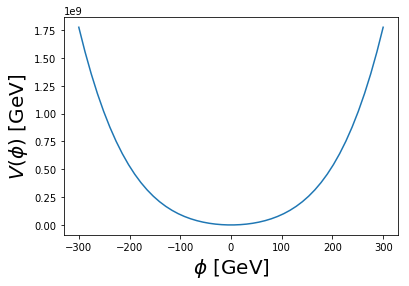

In [66]:
ϕ=np.linspace(-300,300)
V=lambda ϕ: μ**2*ϕ**2+λ*ϕ**4
plt.plot(ϕ, V(ϕ) )
plt.xlabel(r'$\phi$ [GeV]',size=20 )
plt.ylabel(r'$V(\phi)$ [GeV]',size=20)

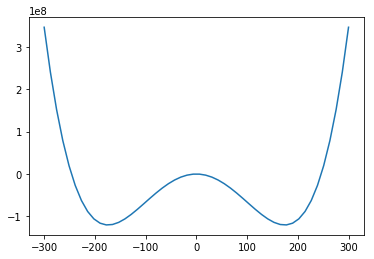

In [67]:
ϕ=np.linspace(-300,300)
V=lambda ϕ: -μ**2*ϕ**2+λ*ϕ**4
plt.plot(ϕ, V(ϕ) )

In [68]:
optimize.fmin_powell(V,200)

Optimization terminated successfully.
         Current function value: -120297525.773196
         Iterations: 2
         Function evaluations: 44


array(174.0956017878611)

In [43]:
V(246)

360086969.08211577

## Least action
See [Least action](./least_action.ipynb)

In [78]:
global g  
g=9.8

In [71]:
def S(x,t=3.,m=0.2,xini=0.,xend=0.):
    t=float(t)
    Dt=t/x[:-1].size
    x=np.asarray(x)
    #Fix initial and final point
    x[0]=xini
    x[-1]=xend
    return ((0.5*m*(x[1:]-x[:-1])**2/Dt**2-0.5*m*g*(x[1:]+x[:-1]))*Dt).sum()

Function to find the least Action by using `scipy.optimize.fmin_powell`. It start from $\mathbf{x}=(x_{\hbox{ini}},0,0,\ldots,x_{\hbox{end}})$ and find the least action

In [79]:
def xfit(n,t=3.,m=0.2,xini=0.,xend=0.,ftol=1E-8):
    '''Find the array of n (odd) components that minimizes the action S(x)

    :Parameters:

    n: odd integer 
        dimension of the ndarray x that minimizes the action  S(x,t,m)
    t,m: numbers
       optional parameters for the action
    ftol: number
        acceptable relative error in S(x) for convergence.

    :Returns: (x,xmax,Smin)
    
    x: ndarray
        minimizer of the action S(x)
        
    xini:
    
    xend:

    xmax: number
        Maximum height for the object

    Smin: number
        value of function at minimum: Smin = S(x)
    '''
    import scipy.optimize as optimize
    t=float(t)
    if n%2==0:
        print ( 'x array must be odd')
        sys.exit()
  
    x0=np.zeros(n)
    a=optimize.fmin_powell(S,x0,args=(t,m,xini,xend),ftol=ftol,full_output=1)
    x=a[0]
    x[0]=xini;x[-1]=xend
    xmax=np.sort(x)[-1]
    Smin=a[1]
    Dt=t/x[:-1].size #  t/(n-1)
    return x,xmax,Smin,Dt  

In [141]:
n=11
t=3. # s
m=0.2 # g
y=xfit(n,t,m,ftol=1E-16)

Optimization terminated successfully.
         Current function value: -21.392910
         Iterations: 15
         Function evaluations: 2154


In [142]:
y

(array([  0.        ,   3.96900002,   7.05599999,   9.26099998,
         10.58400002,  11.02500004,  10.58400005,   9.26100006,
          7.05600004,   3.96900001,   0.        ]),
 11.025000043847939,
 -21.392910000000008,
 0.3)

In [143]:
x=y[0]

In [144]:
t=np.linspace(0,3,n)
P=poly1d ( np.polyfit(t,x,2) )
print( P )

      2
-4.9 x + 14.7 x - 1.402e-08


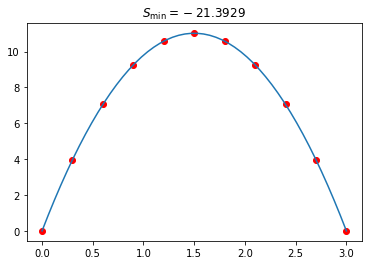

In [145]:
plt.plot(t,x,'ro')
T=np.linspace(0,3)
plt.plot(T,P(T))
plt.title(r'$S_{\rm min}=%g$' %y[2])

In [69]:
t=3.
m=0.2
y=xfit(21,t,m)
x=y[0]
Smin=y[2]
Dt=t/x[:-1].size
tx=np.arange(0,t+Dt,Dt)

[0, 1]